<a href="https://colab.research.google.com/github/YMGYM/python_deeplearning_pytorch/blob/main/Pytorch_part4~.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4-1 Convolutional Neural Network(CNN)

## CNN 기초

### Convolution Layer

이미지를 스캔하면서 이미지 Region Feature를 추출한다.

### Stride
Receptive Field 가 피쳐를 뽑을 때 이동하는 칸 수

### Padding
이미지 테두리 부분에도 Convolution을 적용하기 위해 사용

### Weight Sharing
슬라이드할 때마다 Window 의 같은 가중치를 공유..

### pooling
학습 속도 향상.
Layer 가중치를 반으로 줄여 줌

### Fully Connected Layer
Flatten 후 학습


# 4-2 CNN과 MLP

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms, datasets

In [6]:
DEVICE = "cuda" if torch.cuda.is_available() else 'cpu'

In [7]:
BATCH_SIZE = 32
EPOCHS = 10

In [8]:
train_dataset = datasets.CIFAR10(root='../data/CIFAR', train=True, download=True, transform = transforms.ToTensor())
test_dataset = datasets.CIFAR10(root='../data/CIFAR', train=False, transform = transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset = train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset = test_dataset, batch_size= BATCH_SIZE, shuffle=False)


Extracting ../data/CIFAR/cifar-10-python.tar.gz to ../data/CIFAR


In [9]:
for (X_train, y_train) in train_loader:
  print(f"X_train : {X_train.size()} type: {X_train.type()}")
  print(f"y_train : {y_train.size()} type: {y_train.type()}")
  break

X_train : torch.Size([32, 3, 32, 32]) type: torch.FloatTensor
y_train : torch.Size([32]) type: torch.LongTensor


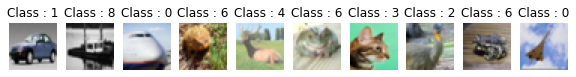

In [ ]:
pltsize = 1
plt.figure(figsize =(10*pltsize, pltsize))

for i in range(10):
  plt.subplot(1, 10, i + 1)
  plt.axis('off')
  plt.imshow(np.transpose(X_train[i], (1,2,0)))
  plt.title('Class : ' + str(y_train[i].item()))

In [ ]:
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.fc1 = nn.Linear(32*32*3, 512)
    self.fc2 = nn.Linear(512, 256)
    self.fc3 = nn.Linear(256, 10)

  def forward(self, x):
    x = x.view(-1, 32 * 32 * 3)
    x = self.fc1(x)
    x = F.relu(x)
    x = self.fc2(x)
    x = F.relu(x)
    x = self.fc3(x)
    x = F.log_softmax(x, dim=1)
    return x

In [ ]:
model = Net().to(DEVICE)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

In [ ]:
model

Net(
  (fc1): Linear(in_features=3072, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=10, bias=True)
)

In [10]:
def train(model, train_loader, optimizer, log_interval):
  model.train()
  for batch_idx, (image, label) in enumerate(train_loader):
    image = image.to(DEVICE)
    label = label.to(DEVICE)

    optimizer.zero_grad()
    output = model(image)
    
    loss = criterion(output, label)
    loss.backward()
    optimizer.step()

    if batch_idx % log_interval == 0:
      print(f" Train Epoch : {Epoch}[{batch_idx * len(image)} / {len(train_loader.dataset)}] {100. * batch_idx / len(train_loader):0.6f}%\t Train Loss : {loss.item()}") 

In [11]:
def evaluate(model, test_loader):
  model.eval()
  test_loss = 0
  correct = 0

  with torch.no_grad():
    for image, label in test_loader:
      label = label.to(DEVICE)
      image = image.to(DEVICE)

      output = model(image)

      
      test_loss += criterion(output, label).item()
      prediction = output.max(1, keepdim = True)[1]
      correct += prediction.eq(label.view_as(prediction)).sum().item()

  test_loss /= len(test_loader.dataset)

  test_accuracy = 100. * correct / len(test_loader.dataset)
  return test_loss, test_accuracy



In [ ]:
for Epoch in range(1, EPOCHS + 1):
  train(model, train_loader, optimizer, log_interval=200)
  test_loss, test_accuracy = evaluate(model, test_loader)
  print(f"\n Test. EPOCH: {Epoch}\t Test Loss : {test_loss:0.4f}\t Test Accuracy: {test_accuracy:0.4f}")

 Train Epoch : 1[0 / 50000] 0.000000%	 Train Loss : 1.890013575553894
 Train Epoch : 1[6400 / 50000] 12.795905%	 Train Loss : 1.6172072887420654
 Train Epoch : 1[12800 / 50000] 25.591811%	 Train Loss : 1.3881436586380005
 Train Epoch : 1[19200 / 50000] 38.387716%	 Train Loss : 1.449142575263977
 Train Epoch : 1[25600 / 50000] 51.183621%	 Train Loss : 1.3396453857421875
 Train Epoch : 1[32000 / 50000] 63.979527%	 Train Loss : 1.4972102642059326
 Train Epoch : 1[38400 / 50000] 76.775432%	 Train Loss : 1.5571694374084473
 Train Epoch : 1[44800 / 50000] 89.571337%	 Train Loss : 1.5386818647384644

 Test. EPOCH: 1	 Test Loss : 0.0502	 Test Accuracy: 42.5300
 Train Epoch : 2[0 / 50000] 0.000000%	 Train Loss : 1.602581262588501
 Train Epoch : 2[6400 / 50000] 12.795905%	 Train Loss : 1.348524808883667
 Train Epoch : 2[12800 / 50000] 25.591811%	 Train Loss : 1.4899369478225708
 Train Epoch : 2[19200 / 50000] 38.387716%	 Train Loss : 1.6458021402359009
 Train Epoch : 2[25600 / 50000] 51.183621%	

In [ ]:
# CNN 모델 설계
class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
    self.conv1 = nn.Conv2d(
        in_channels = 3, out_channels = 8,
        kernel_size = 3,
        padding = 1
    )
    self.conv2 = nn.Conv2d(
        in_channels = 8, out_channels = 16,
        kernel_size = 3,
        padding = 1
    )
    self.pool = nn.MaxPool2d(
        kernel_size =2, stride = 2
    )

    self.fc1 = nn.Linear(8 * 8 * 16, 64)
    self.fc2 = nn.Linear(64, 32)
    self.fc3 = nn.Linear(32, 10)
  
  def forward(self, x):
    # x = (32, 32, 3)
    x = self.conv1(x) # x = (32, 32, 3) ## len(x) - kernel_size + 1
    x = F.relu(x)
    x = self.pool(x) # x = (16, 16, 3)
    x = self.conv2(x) # x = (16, 16, 3) 
    x = F.relu(x)
    x = self.pool(x) # x = (8, 8, 3)

    x = x.view(-1, 8* 8 * 16)
    x = self.fc1(x)
    x = F.relu(x)
    x = self.fc2(x)
    x = F.relu(x)
    x = self.fc3(x)
    x = F.log_softmax(x)

    return x

In [ ]:
model = CNN().to(DEVICE)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

for Epoch in range(1, EPOCHS + 1):
  train(model, train_loader, optimizer, log_interval=200)
  test_loss, test_accuracy = evaluate(model, test_loader)
  print(f"\n Test. EPOCH: {Epoch}\t Test Loss : {test_loss:0.4f}\t Test Accuracy: {test_accuracy:0.4f}")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


 Train Epoch : 1[0 / 50000] 0.000000%	 Train Loss : 2.316953420639038
 Train Epoch : 1[6400 / 50000] 12.795905%	 Train Loss : 1.9072537422180176
 Train Epoch : 1[12800 / 50000] 25.591811%	 Train Loss : 1.8389112949371338
 Train Epoch : 1[19200 / 50000] 38.387716%	 Train Loss : 1.7483105659484863
 Train Epoch : 1[25600 / 50000] 51.183621%	 Train Loss : 1.8058133125305176
 Train Epoch : 1[32000 / 50000] 63.979527%	 Train Loss : 1.4402661323547363
 Train Epoch : 1[38400 / 50000] 76.775432%	 Train Loss : 1.7851563692092896
 Train Epoch : 1[44800 / 50000] 89.571337%	 Train Loss : 1.2397018671035767

 Test. EPOCH: 1	 Test Loss : 0.0479	 Test Accuracy: 43.4600
 Train Epoch : 2[0 / 50000] 0.000000%	 Train Loss : 1.6670119762420654
 Train Epoch : 2[6400 / 50000] 12.795905%	 Train Loss : 1.3766518831253052
 Train Epoch : 2[12800 / 50000] 25.591811%	 Train Loss : 1.3970381021499634
 Train Epoch : 2[19200 / 50000] 38.387716%	 Train Loss : 1.3448647260665894
 Train Epoch : 2[25600 / 50000] 51.18362

# 4-3 Data Augmentation

이미지에 변형을 가하면 데이터를 증가시킬 수 있다.

In [12]:
# Data augmentation 해서 이미지를 불러 옴
train_dataset = datasets.CIFAR10(root = '../data/CIFAR', train=True, download=True, 
                                 transform=transforms.Compose([
                                                               transforms.RandomHorizontalFlip(), # 좌우반전 (50% 확률)
                                                               transforms.ToTensor(), # 정규화(0~1) 및 텐서화
                                                               transforms.Normalize((0.5, 0.5,0.5),(0.5, 0.5,0.5)) # 데이터 정규화(평균과 표준편차 조정), 평균과 표준편차 RGB에 각각 0.5 씩 적용
                                                               ]))
test_dataset = datasets.CIFAR10(root = '../data/CIFAR', train=False, transform=transforms.Compose([transforms.RandomHorizontalFlip(),transforms.ToTensor(), transforms.Normalize((0.5, 0.5,0.5),(0.5, 0.5,0.5))]))

train_loader = torch.utils.data.DataLoader(dataset = train_dataset, batch_size = BATCH_SIZE, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset = test_dataset, batch_size=BATCH_SIZE, shuffle=False)

Files already downloaded and verified


In [4]:
# Augmentation 된 데이터로 학습
model = CNN().to(DEVICE)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

for Epoch in range(1, EPOCHS + 1):
  train(model, train_loader, optimizer, log_interval=200)
  test_loss, test_accuracy = evaluate(model, test_loader)
  print(f"\n Test. EPOCH: {Epoch}\t Test Loss : {test_loss:0.4f}\t Test Accuracy: {test_accuracy:0.4f}")

NameError: ignored

# 4-4 CNN Architecture

### ImageNet
이미지 분류 모델을 측정하기 위한 데이터로 가장 많이 사용되는 데이터

### Network Architecture
네트워크의 성능을 높이기 위한 구조, 깊게 쌓으면서 과적합을 방지하고자 하는 연구.

### LeNet
최초의 CNN모델.
(1990년대에 나온 모델이므로 비교적 단순한 구조를 가지고 있음)

### Alexnet
2012 ILSVRC 대회 우승 모델. 구조는 크게 다르지 않지만 Dropoout, DataAugmentation등을 적용했다.

### VGG
2014 ILSVRC 대회에서 2등을 차지한 모델.

3*3 합성곱 층을 깊게 중첩하는 것이 특징

### GoogLeNet

2014 ILSVRC 대회에서 1등한 모델.

Inception 구조를 처음 적용하고 Gloval Average Pooling 을 처음 적용했음.

### ResNet

2015 ILSVRC 대회에서 1등.
이미지 분류의 기본 모델로 사용하고 있음.

Residual Block 이란 개념 도입. (이전 층의 feature Map을 다음 층의 feature map 에 더해줌) -> 기울기 소실 제거

### DenseNet

ResNet의 확장형 버전. 모든 층에 대해 Skip connection 을 연결한다.

In [ ]:
import torch
import torch.nn as nn
import torch.functional as F

In [ ]:
class BasicBlock(nn.Module):
  def __init__(self, in_planes, planes, stride = 1):
    super(BasicBlock, self).__init__()
    self.conv1 = nn.Conv2d(in_planes, planes,
                           kernel_size = 3,
                           stride = stride,
                           padding = 1,
                           bias = False)
    self.bn1 = nn.BatchNorm2d(planes)
    self.conv2 = nn.Conv2d(planes, planes,
                           kernel_size = 3,
                           stride = 1,
                           padding = 1,
                           bias = False)
    self.bn2 = nn.BatchNorm2d(planes)

    self.shortcut = nn.Sequential()
    if stride != 1 or in_planes != planes:
      self.shortcut = nn.Sequential(
          nn.Conv2d(in_planes, planes,
                    kernel_size = 1,
                    stride = stride,
                    bias = False),

          nn.BathcNorm2d(planes)
      )

  def forward(self, x):
    out = F.relu(self.bn1(self.conv1(x)))
    out = self.bn2(self.conv2(out))
    out += self.sortcut(x)
    out = F.relu(out)
    
    return out

In [ ]:
class ResNet(nn.Module):
  def __init__(self, num_classes = 10):
    super(ResNet, self).__init__()
    self.in_plane = 16

    self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1, bias=False)
    self.bn1 = nn.BatchNorm2d(16)
    self.layer1 = self._make_layer(16, 2, stride=1)
    self.layer2 = self._make_layer(32, 2, stride = 2)
    self.layer3 = self._make_layer(64, 2, stride = 2)
    self.linear = nn.Linear(64, num_classes)


  def _make_layer(self, planes, num_blocks, stride):
    stride = [stride] + [1] * (num_blocks - 1)
    layers = []

    for stride in stride:
      layers.append(BasicBlock(self.in_planes, planes, stride))
      self.in_planes = planes
    return nn.Sequential(*layers)

  def forward(self, x):
    out = F.relu(self.bn1(self.conv1(x)))
    out = self.layer1(out)
    out = self.layer2(out)
    out = self.layer3(out)
    out = F.avg_pool2d(out, 8)
    out = out.view(out.size(0), -1)
    out = self.linear(out)

    return out

## Pytorch 에서 제공하고 있는 레퍼런스 모델을 사용하여 전이학습



In [1]:
import torchvision.models as models
import torch
import torch.nn as nn
import torch.functional as F
import numpy as np

In [2]:
model = models.resnet34(pretrained = False) # 모델의 구조만 가지고 온다.
num_ftrs = model.fc.in_features # 모델의 input 값을 가지고 온다.
model.fc = nn.Linear(num_ftrs, 10) # 
model = model.cuda()

In [14]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

In [15]:
for Epoch in range(1, EPOCHS+1):
  train(model, train_loader, optimizer, 200)
  evaluate(model, test_loader)

 Train Epoch : 1[0 / 50000] 0.000000%	 Train Loss : 2.6761622428894043
 Train Epoch : 1[6400 / 50000] 12.795905%	 Train Loss : 1.9567532539367676
 Train Epoch : 1[12800 / 50000] 25.591811%	 Train Loss : 1.5143628120422363
 Train Epoch : 1[19200 / 50000] 38.387716%	 Train Loss : 1.2545279264450073
 Train Epoch : 1[25600 / 50000] 51.183621%	 Train Loss : 1.7000446319580078
 Train Epoch : 1[32000 / 50000] 63.979527%	 Train Loss : 1.0980358123779297
 Train Epoch : 1[38400 / 50000] 76.775432%	 Train Loss : 1.295883059501648
 Train Epoch : 1[44800 / 50000] 89.571337%	 Train Loss : 1.2032885551452637
 Train Epoch : 2[0 / 50000] 0.000000%	 Train Loss : 1.48259699344635
 Train Epoch : 2[6400 / 50000] 12.795905%	 Train Loss : 1.4761439561843872
 Train Epoch : 2[12800 / 50000] 25.591811%	 Train Loss : 1.2444225549697876
 Train Epoch : 2[19200 / 50000] 38.387716%	 Train Loss : 1.1360934972763062
 Train Epoch : 2[25600 / 50000] 51.183621%	 Train Loss : 1.3263530731201172
 Train Epoch : 2[32000 / 50

# 4-5 Transfer learning

미리 학습된 모델을 가지고 재학습 시키는 과정.

Pretrained model의 Fully Connected Layer이전의 Weight는 학습시키지 않는다. (Freezing)

In [3]:
# 필요한 모듈 import
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F

from torchvision import transforms, datasets

In [5]:
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"{DEVICE} Use.")

cuda Use.


In [6]:
# 하이퍼파라미터 설정
BATCH_SIZE = 32
EPOCHS = 10

In [11]:
# 데이터셋 불러오기
data_transforms = {
    'train' : transforms.Compose([
          transforms.RandomResizedCrop(224), # 이미지 일부를 랜덤으로 선택해 사이즈 변경
          transforms.RandomHorizontalFlip(),
          transforms.ToTensor(),
          transforms.Normalize([0.5,0.5,0.5], [0.5,0.5,0.5])
    ]),
    'val' : transforms.Compose([
          transforms.CenterCrop(224),
          transforms.RandomHorizontalFlip(),
          transforms.ToTensor(),
          transforms.Normalize([0.5,0.5,0.5], [0.5,0.5,0.5])
    ])
}

image_datasets = {x: datasets.ImageFolder("/content/drive/MyDrive/Datasets/hymenoptera_data/hymenoptera_data", data_transforms[x]) for x in ['train', 'val']}
# 반복문을 돌려서 train, val 폴더에 접근

dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x],
                                              batch_size = BATCH_SIZE,
                                              num_workers=0,
                                              shuffle=True) for x in ['train', 'val']}

In [13]:
# 데이터 확인하기
for (X_train, y_train) in dataloaders['train']:
  print('X_train:', X_train.size(), 'type:', X_train.type())
  print('y_train:', y_train.size(), 'type:', y_train.type())
  break

X_train: torch.Size([32, 3, 224, 224]) type: torch.FloatTensor
y_train: torch.Size([32]) type: torch.LongTensor


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

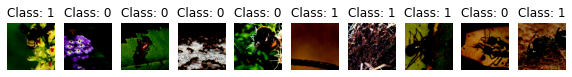

In [16]:
pltsize = 1
plt.figure(figsize = (10 * pltsize, pltsize))

for i in range(10):
  plt.subplot(1, 10, i+1)
  plt.axis('off')
  plt.imshow(np.transpose(X_train[i], (1, 2, 0))) # 3, 224, 224 를 224,224, 3으로 변환
  plt.title('Class: ' + str(y_train[i].item()))

In [36]:
# 학습 함수
def train(model, train_loader, optimizer, log_interval):
  model.train()
  for batch_idx, (image, label) in enumerate(train_loader):
    image = image.to(DEVICE)
    label = label.to(DEVICE)
    optimizer.zero_grad()

    output = model(image)
    loss = criterion(output, label)
    loss.backward()
    optimizer.step()

    if batch_idx % log_interval == 0:
      print(f"Train Epoch: {Epoch} [{batch_idx * len(image)} / {len(train_loader.dataset)}, {100. * batch_idx / len(train_loader):.5f}% ] Loss: {loss.item():.5f}")

In [37]:
def evaluate(model, test_loader):
  model.eval()
  test_loss = 0
  correct = 0

  with torch.no_grad():
    for image, label in test_loader:
      image = image.to(DEVICE)
      label = label.to(DEVICE)

      output = model(image)

      test_loss += criterion(output, label).item()

      prediction = output.max(1, keepdim = True)[1]

      correct += prediction.eq(label.view_as(prediction)).sum().item()

  test_loss /= len(test_loader.dataset)
  test_accuracy = 100. * correct / len(test_loader.dataset)

  print(f"Test Epoch: {Epoch} Accuracy: {test_accuracy:.5f} Loss: {test_loss:.5f}")
  return test_loss, test_accuracy

In [21]:
# 미리 학습되지 않은 Resnet
import torchvision.models as models

model = models.resnet18(pretrained=False)

In [22]:
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 2)
model = model.to(DEVICE)

In [25]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
criterion = nn.CrossEntropyLoss()

In [33]:
for Epoch in range(1, EPOCHS + 1):
  train(model, dataloaders['train'], optimizer, log_interval=5)
  evaluate(model, dataloaders["val"])

Train Epoch: 1 [0 / 397, 0.0% ] Loss: 0.816821813583374
Train Epoch: 1 [160 / 397, 38.46153846153846% ] Loss: 0.7018833160400391
Train Epoch: 1 [320 / 397, 76.92307692307692% ] Loss: 0.6799526810646057
Test Epoch: 1 Accuracy: 38.79093198992443 Loss: 0.02776405853348355
Train Epoch: 2 [0 / 397, 0.0% ] Loss: 0.667687714099884
Train Epoch: 2 [160 / 397, 38.46153846153846% ] Loss: 0.6363753080368042
Train Epoch: 2 [320 / 397, 76.92307692307692% ] Loss: 0.6933073997497559
Test Epoch: 2 Accuracy: 61.20906801007557 Loss: 0.021742423025126422
Train Epoch: 3 [0 / 397, 0.0% ] Loss: 0.6162024140357971
Train Epoch: 3 [160 / 397, 38.46153846153846% ] Loss: 0.6629213690757751
Train Epoch: 3 [320 / 397, 76.92307692307692% ] Loss: 0.6499609351158142
Test Epoch: 3 Accuracy: 61.46095717884131 Loss: 0.021470930774506153
Train Epoch: 4 [0 / 397, 0.0% ] Loss: 0.6811257600784302
Train Epoch: 4 [160 / 397, 38.46153846153846% ] Loss: 0.6152893304824829
Train Epoch: 4 [320 / 397, 76.92307692307692% ] Loss: 0.6

이미 학습된 데이터로 트레이닝

In [34]:
model = models.resnet18(pretrained=True)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 2)
model = model.to(DEVICE)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


In [38]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
criterion = nn.CrossEntropyLoss()

In [39]:
for Epoch in range(1, EPOCHS + 1):
  train(model, dataloaders['train'], optimizer, log_interval=5)
  evaluate(model, dataloaders["val"])

Train Epoch: 1 [0 / 397, 0.00000% ] Loss: 0.62168
Train Epoch: 1 [160 / 397, 38.46154% ] Loss: 0.65241
Train Epoch: 1 [320 / 397, 76.92308% ] Loss: 0.73272
Test Epoch: 1 Accuracy: 62.72040 Loss: 0.01998
Train Epoch: 2 [0 / 397, 0.00000% ] Loss: 0.67335
Train Epoch: 2 [160 / 397, 38.46154% ] Loss: 0.52770
Train Epoch: 2 [320 / 397, 76.92308% ] Loss: 0.59696
Test Epoch: 2 Accuracy: 79.59698 Loss: 0.01604
Train Epoch: 3 [0 / 397, 0.00000% ] Loss: 0.41963
Train Epoch: 3 [160 / 397, 38.46154% ] Loss: 0.61764
Train Epoch: 3 [320 / 397, 76.92308% ] Loss: 0.53508
Test Epoch: 3 Accuracy: 76.32242 Loss: 0.01487
Train Epoch: 4 [0 / 397, 0.00000% ] Loss: 0.37416
Train Epoch: 4 [160 / 397, 38.46154% ] Loss: 0.42998
Train Epoch: 4 [320 / 397, 76.92308% ] Loss: 0.29003
Test Epoch: 4 Accuracy: 86.90176 Loss: 0.01078
Train Epoch: 5 [0 / 397, 0.00000% ] Loss: 0.38609
Train Epoch: 5 [160 / 397, 38.46154% ] Loss: 0.39034
Train Epoch: 5 [320 / 397, 76.92308% ] Loss: 0.29021
Test Epoch: 5 Accuracy: 93.19899

# 5 - 1 Data & Task: 어떤 데이터가 있을까?

Text 데이터를 분석하고 모델링하는 분야를 '자연어 처리'라고 한다.
- NLU: Text -> Meaning
- NLG: Meaning -> Text
- NLP: NLU + NLG

자연어처리의 NLP의 작은 Task 의 요약은 다음과 같다.
### 감정분석
텍스트 데이터가 나타내는 특정 감정을 분류한다. 긍정 부정을 분류 or 긍정까지 n점 척도.
### 요약
텍스트에서 중유한 부분을 찾아내는 Extractive Summarization과 완전히 새로운 문장을 만들어내는 Abstractive Summarization이 있다.

### 기계 번역
이미 많은 서비스에서 사용중. 주로 번역하고자 하는 문장을 Source Sentence, 정답 문장을 Target Sentence라 표현한다.

### 질문 응답
문서를 이해하고 문서속 정보에 대해 질문을 했을 때 답을 이끌어내는 Task. 

### 기타 분야
- POS(Part of Speech) 태깅 분야
- 챗봇
- 각 단어의 중의적 표현을 구분(Word Sense Disambiguation)

In [4]:
# pytorch 를 이용해 데이터 불러오기
from torchtext.legacy import data
from torchtext.legacy import datasets

# 데이터의 Field를 선택하고 가져와야한다.
TEXT = data.Field(lower=True, batch_first = True)  # batch_first 는 Batch_size를 데이터셋의 shape[0]으로 가져온다.
LABEL = data.Field(sequential=False)

train, test = datasets.IMDB.splits(TEXT, LABEL)

aclImdb_v1.tar.gz:   0%|          | 0.00/84.1M [00:00<?, ?B/s]

downloading aclImdb_v1.tar.gz


aclImdb_v1.tar.gz: 100%|██████████| 84.1M/84.1M [00:04<00:00, 20.3MB/s]


In [6]:
train

# 5-2 문자를 숫자로 표현하는 방법

문장을 의미 있는 부분을 숫자로 바꿔 표현한다.
가장 기본적인 방법은 띄어쓰기로 분할하는 것

In [1]:
s1 = "나는 책상 위에 사과를 먹었다."
s2 = "알고 보니 그 사과는 Jason 것이었다."
s3 = "그래서 Jason에게 사과를 했다."

In [2]:
print(s1.split())
print(s2.split())
print(s3.split())

['나는', '책상', '위에', '사과를', '먹었다.']
['알고', '보니', '그', '사과는', 'Jason', '것이었다.']
['그래서', 'Jason에게', '사과를', '했다.']


이처럼 문장을 의미 있는 부분으로 나누는 것을 Tokenization이라고 한다.

In [3]:
token2idx = {}
index = 0

for sentence in [s1, s2, s3]:
  tokens = sentence.split()
  for token in tokens:
    if token2idx.get(token) == None:
      token2idx[token] = index
      index += 1

print(token2idx)

{'나는': 0, '책상': 1, '위에': 2, '사과를': 3, '먹었다.': 4, '알고': 5, '보니': 6, '그': 7, '사과는': 8, 'Jason': 9, '것이었다.': 10, '그래서': 11, 'Jason에게': 12, '했다.': 13}


token2idx를 vocabulary라고 한다.

토큰을 숫자로 바꾸면 다음과 같다.

In [4]:
def indexed_sentence(sentence):
  return [token2idx[token] for token in sentence]

s1_i = indexed_sentence(s1.split())
print(s1_i)
s2_i = indexed_sentence(s2.split())
print(s2_i)
s3_i = indexed_sentence(s3.split())
print(s3_i)

[0, 1, 2, 3, 4]
[5, 6, 7, 8, 9, 10]
[11, 12, 3, 13]
